In [10]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [11]:
api_key = "3pVTC13H7GCChyeNR4Nmxm0jh"
api_key_secret = "q1dVMhsBVUqK092beW1evmwud9JCmlBuFDxrq2YOGiBSJxC0Go"

access_token = "848775572473991169-DA1WgxLVcVRVOVo3g4wm6yDMPX6h9xy"
access_token_secret = "loyzMnFlVPEgnQE3PEMFoyBdKbjVGRF38aKOctJPkadsK"

# authentication
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [46]:
keywords = 'Economy'
limit=200
columns = ['User', 'Tweet']
data = []
tweets = tweepy.Cursor(api.search_tweets, q=keywords, count=100, tweet_mode='extended', lang='en').items(limit)
for tweet in tweets:
    data.append([tweet.user.screen_name, tweet.full_text])
df = pd.DataFrame(data, columns=columns)
# print(df.head())
# print(len(df[['Tweet']]))

In [47]:
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', text) #Removed @mentions
    text = re.sub(r'#', '', text) #Removed the '#' symbol
    text = re.sub(r':', '', text) #Removed the colons
    text = re.sub(r'RT[\s]+', '', text) #Removed the Re-Tweets
    text = re.sub(r'https?:\/\S+', '', text) # remove the hyperlinks
    text = re.sub(r'https', '', text)
    return text

df['Tweet'] = df['Tweet'].apply(cleanTxt)
print(df['Tweet'])

0      Well said!\n\nThe idiocy of attempting to sign...
1      Biden blasted for telling reporter the economy...
2      Trussonomics are dead. And Brexit died with th...
3        Also they're largely a large emitter because...
4      ⚠️Fuel oil is up 58.1%\n⚠️Airline fares are up...
                             ...                        
195    This week, I visited Sentuo Oil Refinery Limit...
196    So  has got a severance payment of £17,000 for...
197    So  has got a severance payment of £17,000 for...
198     Like 2000, 2008, 2020 and many times before, ...
199     PMSL\n\nCommander Morrison is on your list as...
Name: Tweet, Length: 200, dtype: object


In [48]:
# Remove STOPWORDS

In [49]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['Tweet'].apply(getSubjectivity)
df['Polarity'] = df['Tweet'].apply(getPolarity)

df

,User,Tweet,Subjectivity,Polarity
0,SerendipitySays,Well said!\n\nThe idiocy of attempting to sign...,0.637500,0.037500
1,ALLAL2112,Biden blasted for telling reporter the economy...,0.816667,-0.083333
2,hertsref,Trussonomics are dead. And Brexit died with th...,0.200000,-0.100000
3,Shizcrey,Also they're largely a large emitter because...,0.457653,0.055612
4,b1joe,⚠️Fuel oil is up 58.1%\n⚠️Airline fares are up...,0.000000,0.000000
...,...,...,...,...
195,AlanTrendsOffc,"This week, I visited Sentuo Oil Refinery Limit...",0.321429,0.214286
196,stupot_76,"So has got a severance payment of £17,000 for...",0.500000,0.500000
197,DaviesDaviekl61,"So has got a severance payment of £17,000 for...",0.500000,0.500000
198,teller1235,"Like 2000, 2008, 2020 and many times before, ...",0.613810,0.282143


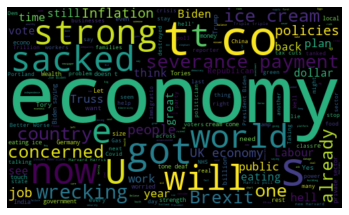

In [50]:
allWords = ''.join([twts for twts in df['Tweet']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [51]:
# Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

df

,User,Tweet,Subjectivity,Polarity,Analysis
0,SerendipitySays,Well said!\n\nThe idiocy of attempting to sign...,0.637500,0.037500,Positive
1,ALLAL2112,Biden blasted for telling reporter the economy...,0.816667,-0.083333,Negative
2,hertsref,Trussonomics are dead. And Brexit died with th...,0.200000,-0.100000,Negative
3,Shizcrey,Also they're largely a large emitter because...,0.457653,0.055612,Positive
4,b1joe,⚠️Fuel oil is up 58.1%\n⚠️Airline fares are up...,0.000000,0.000000,Neutral
...,...,...,...,...,...
195,AlanTrendsOffc,"This week, I visited Sentuo Oil Refinery Limit...",0.321429,0.214286,Positive
196,stupot_76,"So has got a severance payment of £17,000 for...",0.500000,0.500000,Positive
197,DaviesDaviekl61,"So has got a severance payment of £17,000 for...",0.500000,0.500000,Positive
198,teller1235,"Like 2000, 2008, 2020 and many times before, ...",0.613810,0.282143,Positive


In [52]:
# Print all of the positive tweets
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if (sortedDF['Analysis'][i] == 'Positive'):
        print(str(j) + ') ' + sortedDF['Tweet'][i])
        print()
        j = j+1

1) Well said!

The idiocy of attempting to significantly grow the UK economy, with its current…

2)   Also they're largely a large emitter because of their reliance on coal..shifting their economy and manufacturing base to Russian natural gas over the next decade as Europe becomes more reliant on coal and LNG will have a fairly significant effect on this carbon mass balance.

3) The Springbank Dam is needed to protect Calgary homes and Calgary’s economy.

Years of planning and major financial commi…

4)  Funny how Labour were in support of most of the tax cuts.... But now seem bent on further damaging the economy by stirring thing's up......

5) So  has got a severance payment of £17,000 for wrecking the economy and being sacked. That’s more than I e…

6) While the 1940 Act specifically states that managers should vote proxies for the benefit of the investor, economy and the country, ESG values are of great controversy.  We over a custom solution for each investor.

//t.co/txCtZvCNr4 v

In [53]:
#Print all of the negative tweets
j=1
sortedDF = df.sort_values(by=['Polarity'], ascending='False')
for i in range(0, sortedDF.shape[0]):
    if (sortedDF['Analysis'][i] == 'Negative'):
        print(str(j) + ') ' + sortedDF['Tweet'][i])
        print()
        j = j+1

1) Biden blasted for telling reporter the economy is 'strong as hell' while eating ice cream in Portland

//t.co/tnfPqq…

2) Trussonomics are dead. And Brexit died with them. ‘Taking back control’ has led to the chaos that has tanked our economy.…

3) In the US Republicans have said out loud that they will destroy the US economy just to brin…

4) Just freaking windfall tax the shit out of resources companies. We need an economy that works for us.
insiders

5) Why do the politicians fail to see the link between increased housing costs and their much sought after 'gr…

6) “According to data from the Bureau of Labor Statistics, America’s child-care workers make, on average, 59 cents less per hour…

7) CBS POLL Economy is Getting...

Better— 15%
Worse — 65%

Economy Better/Worse
Democrats 27/38
Republicans 6/89
Indepen…

8) If your claim is that Rs 48 billion subsidy by PTI destroyed our economy, then is that not really a damning indictment of t…

9) . headline "Minneapolis had progressive

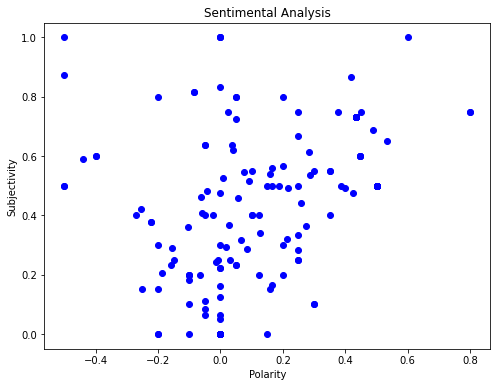

In [55]:
# Plot the bipolarity and subjectivity

plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')
    
plt.title('Sentimental Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [58]:
# Get the percenatage of positive Tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweet']

round(ptweets.shape[0] / df.shape[0] *100, 1)

45.0

In [60]:
# Get the percentage of negative Tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweet']

round(ntweets.shape[0] / df.shape[0] *100, 1)

21.5

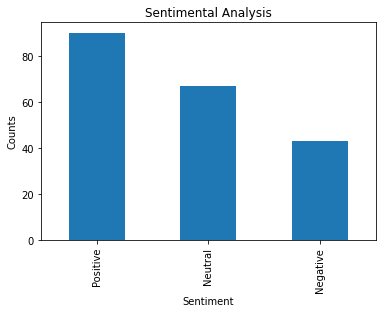

In [63]:
# Show the value counts
df['Analysis'].value_counts()

plt.title('Sentimental Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

In [64]:
df


,User,Tweet,Subjectivity,Polarity,Analysis
0,SerendipitySays,Well said!\n\nThe idiocy of attempting to sign...,0.637500,0.037500,Positive
1,ALLAL2112,Biden blasted for telling reporter the economy...,0.816667,-0.083333,Negative
2,hertsref,Trussonomics are dead. And Brexit died with th...,0.200000,-0.100000,Negative
3,Shizcrey,Also they're largely a large emitter because...,0.457653,0.055612,Positive
4,b1joe,⚠️Fuel oil is up 58.1%\n⚠️Airline fares are up...,0.000000,0.000000,Neutral
...,...,...,...,...,...
195,AlanTrendsOffc,"This week, I visited Sentuo Oil Refinery Limit...",0.321429,0.214286,Positive
196,stupot_76,"So has got a severance payment of £17,000 for...",0.500000,0.500000,Positive
197,DaviesDaviekl61,"So has got a severance payment of £17,000 for...",0.500000,0.500000,Positive
198,teller1235,"Like 2000, 2008, 2020 and many times before, ...",0.613810,0.282143,Positive
